In [1]:
from datetime import datetime

import pandas as pd

# About
Fetch Johns Hopkins Covid data from github.com.

This notebook lets you extract covid case data for a selected country and format it as a time series.

##### Data Source:
* JHU CSSE COVID-19 Data: https://github.com/CSSEGISandData/COVID-19.

# Create Time Series

### Settings

In [2]:
# Country String
country = 'Ireland'

# Datasource
directory = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"
file_name = "time_series_covid19_confirmed_global.csv"

### Fetch Data

In [3]:
# Set the datasource path
file_path = directory + file_name
file_path

'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [4]:
# Load the Data
raw_global_cases = pd.read_csv(file_path)
raw_global_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,49621,49681,49817,50013,50190,50433,50655,50810,50886,51039
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,52004,52542,53003,53425,53814,54317,54827,55380,55755,56254
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,94371,94781,95203,95659,96069,96549,97007,97441,97857,98249
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7519,7560,7577,7602,7633,7669,7699,7756,7806,7821
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,16562,16626,16644,16686,16802,16931,17029,17099,17149,17240


### Get Cumulative Cases Data
We will convert this to daily cases afterwords.

In [5]:
# Filter for selected country
## Countries with Province/State data are a bit more complicated because they have multiple rows
country_cases = raw_global_cases.loc[raw_global_cases['Country/Region']==country]
country_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20
149,NaN,Ireland,53.1424,-7.6921,0,0,0,0,0,0,...,78254,78776,79542,80267,81228,82155,83073,84098,85394,86129


In [6]:
# Remove Location Columns

## Check Columns are as expected
expected_metadata = ['Province/State', 'Country/Region', 'Lat', 'Long']
assert set(country_cases.columns[0:4]) == set(expected_metadata)
assert country_cases.columns[4] == '1/22/20', '5th column should be 22nd January data'

## Reduce to just the case data
country_cases = country_cases.iloc[:,4:]
country_cases

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20
149,0,0,0,0,0,0,0,0,0,0,...,78254,78776,79542,80267,81228,82155,83073,84098,85394,86129


In [7]:
## Convert to time series
assert len(country_cases) == 1, "There should only be one row, the one with Ireland data."

# Pull column from table
country_cases = country_cases.T
country_cases = country_cases.iloc[:,0]

# Assign name and Format index as dates
country_cases.name = f'cumulative_cases_{country}'
country_cases.index = pd.to_datetime(country_cases.index)
country_cases

2020-01-22        0
2020-01-23        0
2020-01-24        0
2020-01-25        0
2020-01-26        0
              ...  
2020-12-23    82155
2020-12-24    83073
2020-12-25    84098
2020-12-26    85394
2020-12-27    86129
Name: cumulative_cases_Ireland, Length: 341, dtype: int64

Now we have the cumulative cases data (see plot below.). A bit more work is needed to get the daily data.

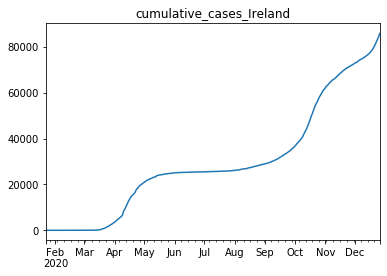

In [8]:
# Plot Cumulative Cases
country_cases.plot(title=country_cases.name);

### Get Daily Cases

In [9]:
# Get daily data from cumulative data
daily_cases = country_cases-country_cases.shift(1)
daily_cases.name = f'daily_cases_{country}'
daily_cases

2020-01-22       NaN
2020-01-23       0.0
2020-01-24       0.0
2020-01-25       0.0
2020-01-26       0.0
               ...  
2020-12-23     927.0
2020-12-24     918.0
2020-12-25    1025.0
2020-12-26    1296.0
2020-12-27     735.0
Name: daily_cases_Ireland, Length: 341, dtype: float64

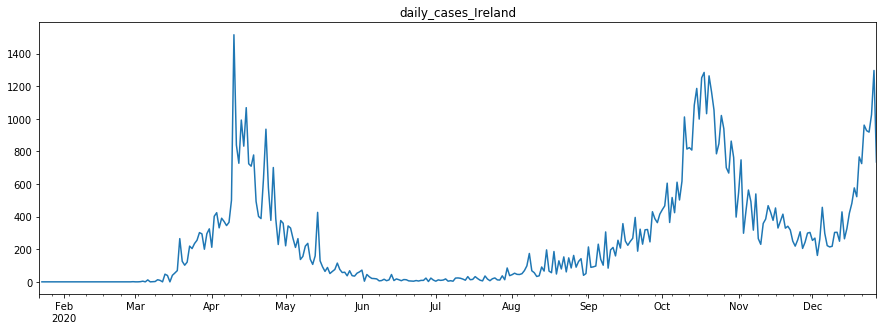

In [10]:
# Plot Daily Cases
daily_cases.plot(title=daily_cases.name, figsize=[15,5]);

You can validate the data by comparing the above plot to what goolge shows. Try [this link](https://g.co/kgs/qpxggo) or just google "Coronavirus Cases Ireland" for example.

### Save to CSV
You might want to save a csv locally. Then you can use [`pd.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to load it cleanly in other notebooks for analysis.

In [11]:
# Set output File Name
today = datetime.now().isoformat()[:10]
output_file_name = f'{country}_daily_cases_{today}.csv'
output_file_name

'Ireland_daily_cases_2020-12-28.csv'

In [12]:
# Ask user to confirm
user_validation = input(f'Confirm with (y/n) to save output_file_name?:')

# Save CSV if confirmed
if user_validation.lower() == 'y':
    daily_cases.to_csv(output_file_name)

Confirm with (y/n) to save output_file_name?:y
